In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [11]:
X_train=X_train/255.0
X_test=X_test/255.0

In [12]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [13]:
datagen.fit(x_train)

In [16]:
model = models.Sequential()

# Input Layer
model.add(layers.Input(shape=(32,32,3)))

# First Conv Block
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Second Conv Block
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Third Conv Block
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Option 1 - Simple (Not recommended)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.3893 - loss: 1.6613 - val_accuracy: 0.4511 - val_loss: 1.5141
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.4041 - loss: 1.6286 - val_accuracy: 0.4963 - val_loss: 1.4050
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.4208 - loss: 1.5900 - val_accuracy: 0.5268 - val_loss: 1.3500
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4313 - loss: 1.5676 - val_accuracy: 0.4707 - val_loss: 1.3993
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4410 - loss: 1.5437 - val_accuracy: 0.5008 - val_loss: 1.3658
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4516 - loss: 1.5232 - val_accuracy: 0.5324 - val_loss: 1.3009
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.4556 - loss: 1.5145 - val_accuracy: 0.5145 - val_loss: 1.3586
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4647 - loss: 1.4940 - 

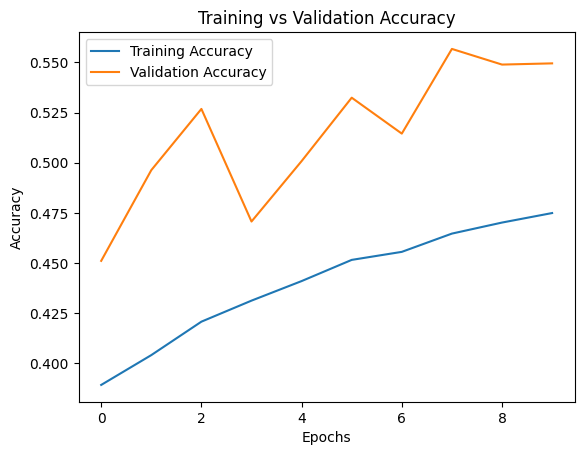

In [21]:

# Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
